In [1]:
import tensorflow 
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image  
from tensorflow.keras.models import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_path = r'C:\Users\SANJAY\Desktop\Covid-19_Project\Covid19-dataset\train'
test_path = r'C:\Users\SANJAY\Desktop\Covid-19_Project\Covid19-dataset\test'

In [3]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(4,4),activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 221, 221, 32)      1568      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 219, 219, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_data = ImageDataGenerator(rescale = 1./255)

In [6]:
train_set = train_data.flow_from_directory(train_path,target_size = (224,224),batch_size = 12,class_mode = 'binary')
test_set = test_data.flow_from_directory(test_path,target_size = (224,224),batch_size = 12,class_mode = 'binary')


Found 279 images belonging to 2 classes.
Found 46 images belonging to 2 classes.


In [7]:
train_set.class_indices

{'Negative': 0, 'Positive': 1}

In [8]:
covid=model.fit(train_set,
                         steps_per_epoch = len(train_set),
                         epochs = 20,
                         validation_data = test_set,
                         validation_steps = len(test_set))

Train for 24 steps, validate for 4 steps
Epoch 1/20
24/24 [==============================] - 65s 3s/step - loss: 0.6835 - accuracy: 0.6308 - val_loss: 0.7167 - val_accuracy: 0.4348
Epoch 2/20
24/24 [==============================] - 68s 3s/step - loss: 0.6924 - accuracy: 0.6272 - val_loss: 0.6498 - val_accuracy: 0.8913
Epoch 3/20
24/24 [==============================] - 63s 3s/step - loss: 0.4710 - accuracy: 0.8172 - val_loss: 0.1524 - val_accuracy: 0.9783
Epoch 4/20
24/24 [==============================] - 62s 3s/step - loss: 0.5103 - accuracy: 0.7849 - val_loss: 0.2231 - val_accuracy: 1.0000
Epoch 5/20
24/24 [==============================] - 61s 3s/step - loss: 0.3336 - accuracy: 0.8817 - val_loss: 0.0764 - val_accuracy: 0.9783
Epoch 6/20
24/24 [==============================] - 62s 3s/step - loss: 0.2659 - accuracy: 0.8996 - val_loss: 0.0941 - val_accuracy: 0.9565
Epoch 7/20
24/24 [==============================] - 64s 3s/step - loss: 0.1681 - accuracy: 0.9355 - val_loss: 0.0414 - 

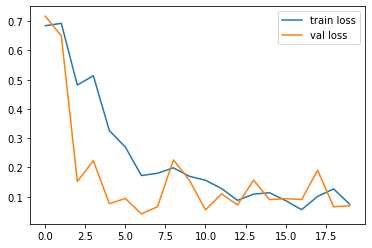

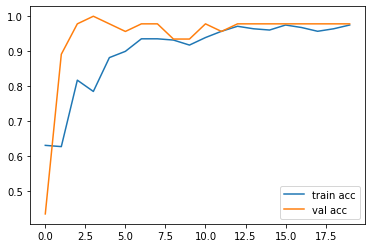

<Figure size 432x288 with 0 Axes>

In [9]:
plt.plot(covid.history['loss'], label='train loss')
plt.plot(covid.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(covid.history['accuracy'], label='train acc')
plt.plot(covid.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [10]:
!pip install pyyaml h5py

In [11]:
model.save('covid.h5')